In [1]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os 
import shutil 
import random 
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
%matplotlib inline

In [2]:
# Organize data into train, valid, test dirs 
os.chdir('Dataset/catvdog') 
if os.path.isdir('train/dog') is False:
    os.makedirs('train1/dog')
    os.makedirs('train1/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat') 

    for c in random.sample(glob.glob('train/cat*'), 500):
        shutil.move(c, 'train1/cat/')
    for c in random. sample(glob.glob('train/dog*'), 500):
        shutil.move(c, 'train1/dog/')
    for c in random. sample(glob.glob('train/cat*'), 100):
        shutil.move(c, 'valid/cat/')
    for c in random. sample(glob.glob('train/dog*'), 100):
        shutil.move(c, 'valid/dog/')
    for c in random. sample(glob.glob('train/cat*'), 50):
        shutil.move(c, 'test/cat/')
    for c in random.sample(glob.glob('train/dog*'), 50):
        shutil.move(c, 'test/dog/')

os.chdir('../../')


In [8]:
train_path = 'Dataset/catvdog/train'
valid_path = 'Dataset/catvdog/valid'
test_path = 'Dataset/catvdog/test'

In [9]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10, shuffle = False)

Found 84 images belonging to 2 classes.
Found 35 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [10]:
images, labels = next(train_batches)

In [11]:
def plotimages(images_arr):
    fig, axes = plt. subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off') 
    plt.tight_layout()
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

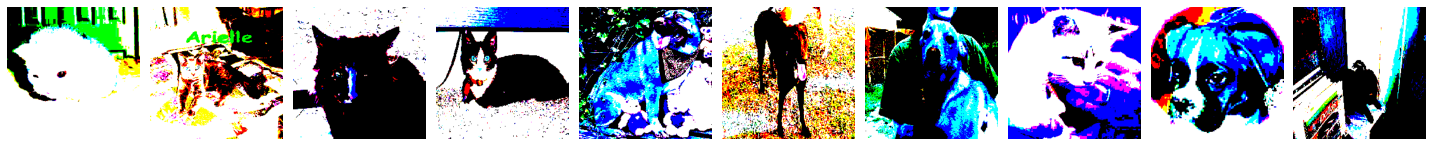

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [12]:
plotimages(images)
labels

In [13]:
model = Sequential([Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)), 
        MaxPool2D(pool_size=(2, 2), strides=2), 
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'), MaxPool2D(pool_size=(2, 2), strides=2), 
        Flatten(), Dense(units=2, activation='softmax'), 
])

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)
model.save('models/CNN_model.h5')

Epoch 1/10


In [ ]:
test_images, test_label = next(test_batch)
prediction = model.predict(x=test_batches, verbose = 0)
np.round(prediction)